# 4. Models demand per zones

In the previous notebook, models have been developed to predict the demand for bicycles per hour at an aggregate level, i.e. taking into account the overall demand for the entire service.

In order to be able to make business decisions and to know where more bicycles should be restocked, we are going to make a model for each area of Madrid.

To do this, we will first analyze how we divide into zones the whole area covered by Bicimad services.

Secondly, we will model each zone separately.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
rides_per_station = pd.read_csv("rides_per_station.csv")

In [9]:
rides_per_station

,Unnamed: 0,idunplug_station,date,weekday,hour,month,year,day,time,datetime,rides,id,address,name,total_bases,longitude,latitude,postal_code
0,0,1,2019-01-01,Tuesday,8,1,2019,1,08:00:00,2019-01-01 08:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
1,1,1,2019-01-01,Tuesday,11,1,2019,1,11:00:00,2019-01-01 11:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
2,2,1,2019-01-01,Tuesday,13,1,2019,1,13:00:00,2019-01-01 13:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
3,3,1,2019-01-01,Tuesday,14,1,2019,1,14:00:00,2019-01-01 14:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
4,4,1,2019-01-01,Tuesday,15,1,2019,1,15:00:00,2019-01-01 15:00:00,2,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629781,2629781,270,2021-06-30,Wednesday,18,6,2021,30,18:00:00,2021-06-30 18:00:00,4,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003
2629782,2629782,270,2021-06-30,Wednesday,19,6,2021,30,19:00:00,2021-06-30 19:00:00,2,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003
2629783,2629783,270,2021-06-30,Wednesday,20,6,2021,30,20:00:00,2021-06-30 20:00:00,2,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003
2629784,2629784,270,2021-06-30,Wednesday,21,6,2021,30,21:00:00,2021-06-30 21:00:00,1,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003


## 4.1. Modeling the zones

As a first approach we are going to divide the stations depending on the postal code. 

On the first notebook we created a csv with the stations we are going to consider and the postal code, now we are going to use that file to understand how many zones we are going to consider

In [10]:
stations = pd.read_csv("all_stations.csv")
stations

,Unnamed: 0,id,address,name,total_bases,longitude,latitude,postal_code
0,0,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
1,1,2,Puerta del Sol nº 1,Puerta del Sol B,30,-3.701603,40.417313,28014
2,2,3,Calle Miguel Moya nº 1,Miguel Moya,24,-3.705842,40.420589,28004
3,3,4,Plaza del Conde del Valle de Súchil nº 3,Plaza Conde Suchil,18,-3.706917,40.430294,28001
4,4,5,Calle Manuela Malasaña nº 5,Malasaña,24,-3.702587,40.428552,28004
...,...,...,...,...,...,...,...,...
259,259,265,Avenida Juan de Herrera frente a la calle Paul...,INEF,24,-3.729970,40.438960,28001
260,260,266,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 1,24,-3.726990,40.443750,28001
261,261,267,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 2,24,-3.726930,40.443420,28001
262,262,268,Calle José Antonio Novais frente al nº 12,Facultad Biología,24,-3.727295,40.448332,28001


In [18]:
stations_per_postal = stations.groupby(['postal_code'])['id'].count()
stations_per_postal = stations_per_postal.sort_values(ascending=False)
stations_per_postal = stations_per_postal.reset_index()

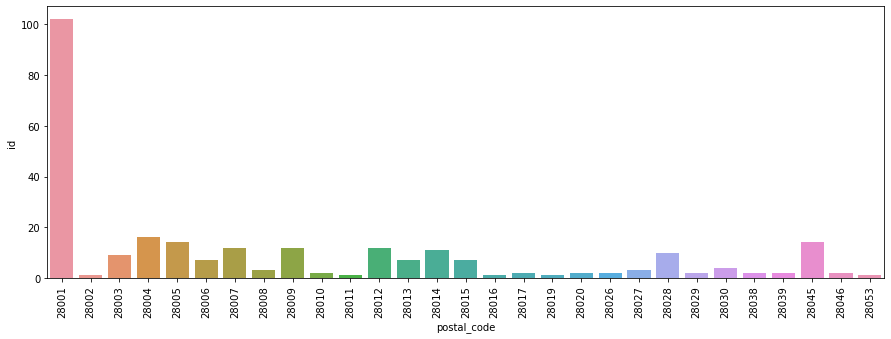

In [25]:
fig = plt.figure(figsize=(15,5))

sns.barplot(data=stations_per_postal, x='postal_code', y = 'id');
plt.xticks(rotation=90);

As we can see in the plot above the postal code 28001 (Madrid), has a lot of stations, we are going to perform a cluster analysis in this zone so the number of stations per zone is equally distributed

In [26]:
stations_28001 = stations[stations['postal_code']==28001]

In [27]:
stations_28001

,Unnamed: 0,id,address,name,total_bases,longitude,latitude,postal_code
3,3,4,Plaza del Conde del Valle de Súchil nº 3,Plaza Conde Suchil,18,-3.706917,40.430294,28001
8,8,9,Plaza de Alonso Martínez nº 5,Alonso Martínez,24,-3.695440,40.427868,28001
14,14,15,Calle Duque de Liria,Ventura Rodríguez,24,-3.713479,40.426096,28001
18,18,19,Plaza de Pedro Zerolo nº 1,Plaza de Pedro Zerolo,24,-3.699650,40.420777,28001
21,21,25,Calle Jacometrezo nº 3,Jacometrezo,24,-3.706538,40.420078,28001
...,...,...,...,...,...,...,...,...
259,259,265,Avenida Juan de Herrera frente a la calle Paul...,INEF,24,-3.729970,40.438960,28001
260,260,266,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 1,24,-3.726990,40.443750,28001
261,261,267,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 2,24,-3.726930,40.443420,28001
262,262,268,Calle José Antonio Novais frente al nº 12,Facultad Biología,24,-3.727295,40.448332,28001


In [28]:
from sklearn.cluster import KMeans


In [29]:
stations_28001 = stations_28001[['id', 'longitude', 'latitude']]

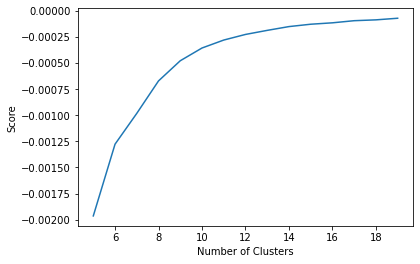

In [43]:
K_clusters = range(5,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = stations_28001[['latitude']]
X_axis = stations_28001[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualization
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

From the elbow curve above we can see that from 10 clusters on the slope remains almost constant, so more than 10 clusters are not going to be useful

In [51]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(stations_28001[stations_28001.columns[1:3]]) # Compute k-means clustering.

stations_28001['cluster_label'] = kmeans.fit_predict(stations_28001[stations_28001.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(stations_28001[stations_28001.columns[1:3]]) # Labels of each point
stations_28001.head(10)


<ipython-input-51-f012068baa9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_28001['cluster_label'] = kmeans.fit_predict(stations_28001[stations_28001.columns[1:3]])


,id,longitude,latitude,cluster_label
3,4,-3.706917,40.430294,4
8,9,-3.695440,40.427868,4
14,15,-3.713479,40.426096,0
18,19,-3.699650,40.420777,6
21,25,-3.706538,40.420078,6
23,27,-3.710692,40.417908,6
30,34,-3.711504,40.419210,6
32,36,-3.706103,40.415010,6
34,38,-3.703683,40.414676,6
41,45,-3.699115,40.412205,6


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

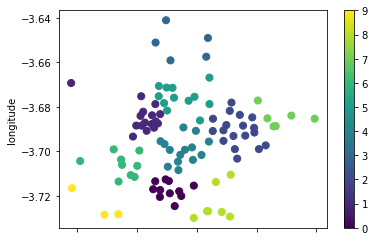

In [55]:
stations_28001.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')

In the plot above we see the division per zones depending on the latitude and longitude. This is the division we are going to do in order to predict the demand